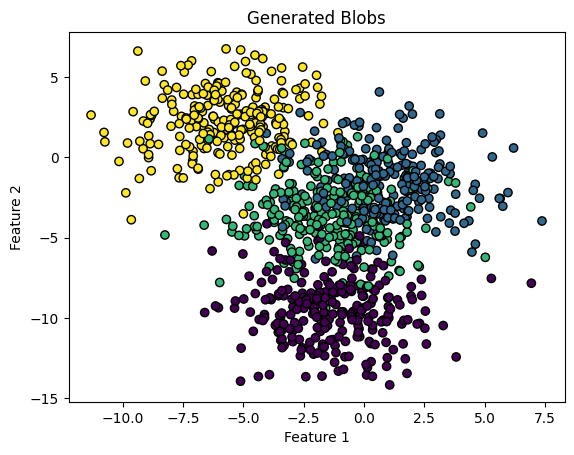

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2, random_state=2)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Blobs')
plt.show()

In [2]:
y = to_categorical(y)
y


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [5]:
n_train = 800
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)

trainX

(800, 2) (200, 2)


array([[ 0.96599705, -5.11373738],
       [-3.77797657, -3.82981689],
       [-0.56458576, -3.41782764],
       ...,
       [-1.67762135,  2.10320384],
       [-0.48596459, -3.18505557],
       [ 1.81720094, -1.17838085]])

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\MAC\.conda\envs\venv_lmm\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 66 (264.00 B)

In [ ]:
model.fit(trainX, trainy, epochs=50, batch_size=32, validation_data=(testX, testy), verbose=1)
_, accuracy = model.evaluate(testX, testy, verbose=0)
print('Test accuracy:', accuracy)

predictions = model.predict(testX)
predicted_classes = predictions.argmax(axis=1) # Get the index of the maximum value in each row
true_classes = testy.argmax(axis=1)

print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

Epoch 1/50


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8130 - loss: 0.4834 - val_accuracy: 0.8300 - val_loss: 0.3921
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8057 - loss: 0.4681 - val_accuracy: 0.8300 - val_loss: 0.3871
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.4381 - val_accuracy: 0.8250 - val_loss: 0.3839
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8240 - loss: 0.4670 - val_accuracy: 0.8400 - val_loss: 0.3837
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8177 - loss: 0.4603 - val_accuracy: 0.8450 - val_loss: 0.3841
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.4693 - val_accuracy: 0.8300 - val_loss: 0.3872
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8167 - loss: 0.4620 - val_accuracy: 0.8450 - val_loss: 0.3869
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7915 - loss: 0.4721 - val_accuracy: 0.8150 - val_loss: 0.3883
Epo